In [2]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm, invgamma, gamma
from scipy.linalg import sqrtm
from scipy.optimize import minimize
import pandas as pd
from tqdm import tqdm

# Оценки для опционов колл на отношение цен

Пример (Haug, 2007, с. 203). Вычислите оценки для опционов колл на отношение для
$\sigma_1=0.3$, $\sigma_2=0.4$, $b_1=0.05$,
$b_2=0.03$, $r=0.07$, $S_1=130$, $S_2=100$, $T=0.25, 0.5$, $\rho=\{-0.5, 0, 0.5\}$ и $K=0.1, 0.2, \ldots, 1.0, 2.0, 3.0$, безрисковая ставка 7\%.

In [13]:
sigma1 = 0.3
sigma2 = 0.4
b1 = 0.05
b2 = 0.03
r = 0.07
S1 = 130
S2 = 100
T_range = [0.25, 0.5]
rho_range = [-0.5, 0, 0.5]
K_range = list(np.arange(0.1, 3.1, 0.1))

In [14]:
# оценка стоимости опциона колл на отношение цен двух активов
def quotient_option_price_Zhang(S1, S2, b1, b2, sigma1, sigma2, K, rho, T, is_call):
    theta = 1
    if is_call == False:
        theta = -1
    sigma_hat = np.sqrt(sigma1 ** 2 + sigma2 ** 2 - 2 * rho * sigma1 * sigma2)

    d1 = (np.log(S1 / S2 / K) + (b1 - b2 - 0.5 * (sigma1 ** 2 - sigma2 ** 2)) * T) / \
         (sigma_hat * np.sqrt(T))
    d2 = d1 + sigma_hat * np.sqrt(T)
    F = S1 / S2 * np.exp((b1 - b2 +  sigma2 * (sigma2 - rho * sigma1)) * T)
    option = theta * np.exp(-r * T) * (F * norm.cdf(theta * d2) - K * norm.cdf(theta * d1))

    return option

In [15]:
outperformance_df = pd.DataFrame([
    {
        'K': K,
        'rho': rho,
        'T': T,
        'price':quotient_option_price_Zhang(S1, S2, b1, b2, sigma1, sigma2, K, rho, T, is_call = True)
    }
    for K in K_range
    for rho in rho_range
    for T in T_range
])

In [16]:
pd.pivot_table(outperformance_df, values='price', index=['K'], columns=['T', 'rho'])

T        0.25                              0.50                    
rho      -0.5       0.0           0.5      -0.5       0.0       0.5
K                                                                  
0.1  1.258176  1.237981  1.218087e+00  1.318772  1.276942  1.236349
0.2  1.159910  1.139716  1.119822e+00  1.222211  1.180382  1.139789
0.3  1.061645  1.041450  1.021556e+00  1.125658  1.083821  1.043228
0.4  0.963381  0.943185  9.232911e-01  1.029201  0.987271  0.946668
0.5  0.865142  0.844921  8.250259e-01  0.933227  0.890826  0.850109
0.6  0.767100  0.746686  7.267608e-01  0.838607  0.794886  0.753578
0.7  0.669880  0.648681  6.285021e-01  0.746640  0.700395  0.657273
0.8  0.574835  0.551674  5.303439e-01  0.658795  0.608852  0.561914
0.9  0.484000  0.457423  4.328959e-01  0.576419  0.522055  0.469130
1.0  0.399660  0.368638  3.382126e-01  0.500532  0.441702  0.381422
1.1  0.323794  0.288321  2.503546e-01  0.431749  0.369086  0.301586
1.2  0.257675  0.218872  1.743351e-01  0.370288  0.304936  0.231923
1.3  0.201735  0.161489  1.138825e-01  0.316041  0.249416  0.173677
1.4  0.155654  0.116063  6.986651e-02  0.268656  0.202224  0.126904
1.5  0.118577  0.081469  4.041277e-02  0.227624  0.162732  0.090696
1.6  0.089341  0.056007  2.215991e-02  0.192349  0.130120  0.063560
1.7  0.066683  0.037811  1.158871e-02  0.162202  0.103489  0.043788
1.8  0.049379  0.025132  5.814785e-03  0.136562  0.081946  0.029725
1.9  0.036324  0.016485  2.815324e-03  0.114840  0.064655  0.019926
2.0  0.026575  0.010692  1.322108e-03  0.096496  0.050866  0.013215
2.1  0.019356  0.006871  6.050017e-04  0.081041  0.039927  0.008687
2.2  0.014049  0.004381  2.708747e-04  0.068047  0.031287  0.005668
2.3  0.010168  0.002776  1.190836e-04  0.057135  0.024487  0.003676
2.4  0.007344  0.001750  5.156523e-05  0.047983  0.019148  0.002372
2.5  0.005296  0.001099  2.205238e-05  0.040310  0.014966  0.001525
2.6  0.003816  0.000688  9.336073e-06  0.033882  0.011695  0.000977
2.7  0.002747  0.000430  3.920709e-06  0.028496  0.009140  0.000625
2.8  0.001978  0.000268  1.636139e-06  0.023983  0.007145  0.000399
2.9  0.001424  0.000167  6.795067e-07  0.020201  0.005588  0.000254
3.0  0.001025  0.000104  2.812284e-07  0.017030  0.004374  0.000162

Пример. Повторите вычисления для опционов пут.

In [17]:
# оценка стоимости опциона колл на отношение цен двух активов
def quotient_option_price_Zhang(S1, S2, b1, b2, sigma1, sigma2, K, rho, T, is_call):
    theta = 1
    if is_call == False:
        theta = -1
    sigma_hat = np.sqrt(sigma1 ** 2 + sigma2 ** 2 - 2 * rho * sigma1 * sigma2)

    d1 = (np.log(S1 / S2 / K) + (b1 - b2 - 0.5 * (sigma1 ** 2 - sigma2 ** 2)) * T) / \
         (sigma_hat * np.sqrt(T))
    d2 = d1 + sigma_hat * np.sqrt(T)
    F = S1 / S2 * np.exp((b1 - b2 +  sigma2 * (sigma2 - rho * sigma1)) * T)
    option = theta * np.exp(-r * T) * (F * norm.cdf(theta * d2) - K * norm.cdf(theta * d1))

    return option

In [18]:
outperformance_df = pd.DataFrame([
    {
        'K': K,
        'rho': rho,
        'T': T,
        'price':quotient_option_price_Zhang(S1, S2, b1, b2, sigma1, sigma2, K, rho, T, is_call = False)
    }
    for K in K_range
    for rho in rho_range
    for T in T_range
])

pd.pivot_table(outperformance_df, values='price', index=['K'], columns=['T', 'rho'])

T            0.25                                      0.50                \
rho          -0.5           0.0           0.5          -0.5           0.0   
K                                                                           
0.1  3.778084e-20  6.901476e-28  1.250578e-49  5.123091e-12  4.854537e-16   
0.2  2.487462e-12  1.411677e-16  2.177139e-28  7.989515e-08  4.387780e-10   
0.3  9.205951e-09  1.827384e-11  6.814500e-19  7.344569e-06  2.454494e-07   
0.4  1.134986e-06  1.683099e-08  1.869670e-13  1.112457e-04  1.041540e-05   
0.5  2.695529e-05  1.424162e-06  5.708291e-10  6.978822e-04  1.261876e-04   
0.6  2.507371e-04  3.109487e-05  1.365790e-07  2.637833e-03  7.469382e-04   
0.7  1.295519e-03  2.910915e-04  6.678895e-06  7.231218e-03  2.815519e-03   
0.8  4.515951e-03  1.549517e-03  1.137204e-04  1.594718e-02  7.833919e-03   
0.9  1.194655e-02  5.564030e-03  9.309483e-04  3.013163e-02  1.759664e-02   
1.0  2.587163e-02  1.504463e-02  4.512810e-03  5.080542e-02  3.380455e-02   
1.1  4.827076e-02  3.299232e-02  1.492005e-02  7.858253e-02  5.774939e-02   
1.2  8.041701e-02  6.180836e-02  3.716581e-02  1.136823e-01  9.015964e-02   
1.3  1.227419e-01  1.026904e-01  7.497846e-02  1.559958e-01  1.311999e-01   
1.4  1.749267e-01  1.555300e-01  1.292277e-01  2.051716e-01  1.805689e-01   
1.5  2.361140e-01  2.192013e-01  1.980391e-01  2.607001e-01  2.376376e-01   
1.6  3.051435e-01  2.920045e-01  2.780515e-01  3.219852e-01  3.015858e-01   
1.7  3.807513e-01  3.720740e-01  3.657455e-01  3.883986e-01  3.715156e-01   
1.8  4.617120e-01  4.576603e-01  4.582368e-01  4.593193e-01  4.465333e-01   
1.9  5.469222e-01  5.472780e-01  5.535026e-01  5.341583e-01  5.258026e-01   
2.0  6.354385e-01  6.397508e-01  6.502746e-01  6.123745e-01  6.085738e-01   
2.1  7.264853e-01  7.341944e-01  7.478227e-01  6.934807e-01  6.941958e-01   
2.2  8.194428e-01  8.299700e-01  8.457538e-01  7.770463e-01  7.821164e-01   
2.3  9.138275e-01  9.266300e-01  9.438672e-01  8.626954e-01  8.718762e-01   
2.4  1.009269e+00  1.023869e+00  1.042065e+00  9.501033e-01  9.630981e-01   
2.5  1.105486e+00  1.121483e+00  1.140301e+00  1.038992e+00  1.055477e+00   
2.6  1.202271e+00  1.219338e+00  1.238553e+00  1.129124e+00  1.148766e+00   
2.7  1.299467e+00  1.317344e+00  1.336813e+00  1.220298e+00  1.242772e+00   
2.8  1.396963e+00  1.415448e+00  1.435076e+00  1.312346e+00  1.337337e+00   
2.9  1.494674e+00  1.513612e+00  1.533340e+00  1.405125e+00  1.432341e+00   
3.0  1.592541e+00  1.611815e+00  1.631605e+00  1.498514e+00  1.527687e+00   

T                  
rho           0.5  
K                  
0.1  3.181683e-27  
0.2  2.895217e-16  
0.3  2.671441e-11  
0.4  2.054317e-08  
0.5  1.562804e-06  
0.6  3.195037e-05  
0.7  2.870075e-04  
0.8  1.489080e-03  
0.9  5.265529e-03  
1.0  1.411781e-02  
1.1  3.084259e-02  
1.2  5.774018e-02  
1.3  9.605428e-02  
1.4  1.458417e-01  
1.5  2.061943e-01  
1.6  2.756193e-01  
1.7  3.524075e-01  
1.8  4.349048e-01  
1.9  5.216662e-01  
2.0  6.115164e-01  
2.1  7.035486e-01  
2.2  7.970902e-01  
2.3  8.916586e-01  
2.4  9.869155e-01  
2.5  1.082629e+00  
2.6  1.178642e+00  
2.7  1.274850e+00  
2.8  1.371184e+00  
2.9  1.467600e+00  
3.0  1.564069e+00

### Задача

In [19]:

def quotient_option_price_Zhang(S1, S2, b1, b2, sigma1, sigma2, K, rho, T, is_call):
    theta = 1 if is_call else -1
    sigma_hat = np.sqrt(sigma1**2 + sigma2**2 - 2 * rho * sigma1 * sigma2)
    d1 = (np.log(S1 / S2 / K) + (b1 - b2 - 0.5 * (sigma1**2 - sigma2**2)) * T) / \
         (sigma_hat * np.sqrt(T))
    d2 = d1 + sigma_hat * np.sqrt(T)
    F = S1 / S2 * np.exp((b1 - b2 + sigma2 * (sigma2 - rho * sigma1)) * T)
    option = theta * np.exp(-r * T) * (F * norm.cdf(theta * d2) - K * norm.cdf(theta * d1))
    return option

def option_parity_check(S1, S2, b1, b2, sigma1, sigma2, K, rho, T):
    call_price = quotient_option_price_Zhang(S1, S2, b1, b2, sigma1, sigma2, K, rho, T, is_call=True)
    put_price = quotient_option_price_Zhang(S1, S2, b1, b2, sigma1, sigma2, K, rho, T, is_call=False)
    theoretical_diff = (S1 / S2) * np.exp((b1 - b2) * T) - K * np.exp(-r * T)
    return {
        'K': K,
        'rho': rho,
        'T': T,
        'Call_Put_Difference': call_price - put_price,
        'Theoretical_Difference': theoretical_diff,
        'Difference_Error': call_price - put_price - theoretical_diff
    }

parity_check_results = pd.DataFrame([
    option_parity_check(S1, S2, b1, b2, sigma1, sigma2, K, rho, T)
    for K in K_range
    for rho in rho_range
    for T in T_range
])

parity_check_results

,K,rho,T,Call_Put_Difference,Theoretical_Difference,Difference_Error
0,0.1,-0.5,0.25,1.258176,1.208251,0.049925
1,0.1,-0.5,0.50,1.318772,1.216505,0.102267
2,0.1,0.0,0.25,1.237981,1.208251,0.029730
3,0.1,0.0,0.50,1.276942,1.216505,0.060438
4,0.1,0.5,0.25,1.218087,1.208251,0.009836
...,...,...,...,...,...,...
175,3.0,-0.5,0.50,-1.481484,-1.583751,0.102267
176,3.0,0.0,0.25,-1.611711,-1.641440,0.029730
177,3.0,0.0,0.50,-1.523313,-1.583751,0.060438
178,3.0,0.5,0.25,-1.631605,-1.641440,0.009836


# Оценки для опционов на произведение цен

Пример (Haug, 2007, с. 205). Вычислите оценки для опционов колл на произведение цен для $K=15000$, $S_1=100$, $S_2=105$, $b_1=0.02$, $b_2=0.05$, $T=0.5, 1$, $\sigma_1=\{0.2, 0.3, 0.4\}$, $\sigma_2=0.3$, безрисковая ставка $r=0.07$.

In [20]:
K = 15000
b1 = 0.02
b2 = 0.05
r = 0.07
S1 = 100
S2 = 105
T_range = [0.1, 0.5]
rho_range = [-0.5, 0, 0.5]
sigma1_range = [0.2, 0.3, 0.4]
sigma2 = 0.3

In [21]:
#  оценка стоимости опциона колл на произведение цен двух активов
def product_option_price(S1, S2, b1, b2, sigma1, sigma2, K, rho, T, is_call):
    theta = 1
    if is_call == False:
        theta = -1
    sigma_hat = np.sqrt(sigma1 ** 2 + sigma2 ** 2 + 2 * rho * sigma1 * sigma2)

    d1 = (np.log(S1 * S2 / K) + (b1 + b2 - 0.5 * (sigma1 ** 2 + sigma2 ** 2)) * T) / \
         (sigma_hat * np.sqrt(T))
    d2 = d1 + sigma_hat * np.sqrt(T)

    F = S1 * S2 * np.exp((b1 + b2 + rho * sigma1 * sigma2) * T)
    option = theta * np.exp(-r * T) * (F * norm.cdf(theta * d2) - K * norm.cdf(theta * d1))

    return option

In [22]:
prices_df = pd.DataFrame([
    {
        'sigma1': sigma1,
        'sigma2': sigma2,
        'rho': rho,
        'T': T,
        'price': product_option_price(S1, S2, b1, b2, sigma1, sigma2, K, rho, T, is_call = True)
    }
    for sigma1 in sigma1_range
    for rho in rho_range
    for T in T_range
])

pd.pivot_table(prices_df, values='price', index=['sigma1', 'sigma2'], columns=['T', 'rho'])

T                   0.1                              0.5              \
rho                -0.5       0.0        0.5        -0.5         0.0   
sigma1 sigma2                                                          
0.2    0.3     0.002812  0.428850   3.295569   32.613246  154.337957   
0.3    0.3     0.026672  2.402646  13.261771   56.773262  266.159407   
0.4    0.3     0.353503  9.327321  35.490780  118.150427  425.940177   

T                          
rho                   0.5  
sigma1 sigma2              
0.2    0.3     319.714092  
0.3    0.3     531.789411  
0.4    0.3     787.974208

Пример. Повторите вычисления для опционов пут.

In [23]:
#  оценка стоимости опциона пут на произведение цен двух активов
def product_option_price(S1, S2, b1, b2, sigma1, sigma2, K, rho, T, is_call):
    theta = 1
    if is_call == False:
        theta = -1
    sigma_hat = np.sqrt(sigma1 ** 2 + sigma2 ** 2 + 2 * rho * sigma1 * sigma2)

    d1 = (np.log(S1 * S2 / K) + (b1 + b2 - 0.5 * (sigma1 ** 2 + sigma2 ** 2)) * T) / \
         (sigma_hat * np.sqrt(T))
    d2 = d1 + sigma_hat * np.sqrt(T)

    F = S1 * S2 * np.exp((b1 + b2 + rho * sigma1 * sigma2) * T)
    option = theta * np.exp(-r * T) * (F * norm.cdf(theta * d2) - K * norm.cdf(theta * d1))

    return option

In [24]:
prices_df = pd.DataFrame([
    {
        'sigma1': sigma1,
        'sigma2': sigma2,
        'rho': rho,
        'T': T,
        'price': product_option_price(S1, S2, b1, b2, sigma1, sigma2, K, rho, T, is_call = False)
    }
    for sigma1 in sigma1_range
    for rho in rho_range
    for T in T_range
])

pd.pivot_table(prices_df, values='price', index=['sigma1', 'sigma2'], columns=['T', 'rho'])

T                      0.1                                    0.5  \
rho                   -0.5          0.0          0.5         -0.5   
sigma1 sigma2                                                       
0.2    0.3     4426.822253  4395.795494  4367.114916  4173.019124   
0.3    0.3     4442.537163  4397.769290  4361.271943  4274.466515   
0.4    0.3     4458.531524  4404.693965  4367.668045  4412.553568   

T                                        
rho                    0.0          0.5  
sigma1 sigma2                            
0.2    0.3     4138.419201  4145.108158  
0.3    0.3     4250.240651  4276.942796  
0.4    0.3     4410.021421  4452.282846

### Задача

In [28]:
K = 15000
b1 = 0.02
b2 = 0.05
r = 0.07
S1 = 100
S2 = 105
T_range = [0.1, 0.5]
rho_range = [-0.5, 0, 0.5]
sigma1_range = [0.2, 0.3, 0.4]
sigma2 = 0.3

def product_option_price(S1, S2, b1, b2, sigma1, sigma2, K, rho, T, is_call):
    theta = 1 if is_call else -1
    sigma_hat = np.sqrt(sigma1 ** 2 + sigma2 ** 2 + 2 * rho * sigma1 * sigma2)

    d1 = (np.log(S1 * S2 / K) + (b1 + b2 - 0.5 * sigma_hat ** 2) * T) / (sigma_hat * np.sqrt(T))
    d2 = d1 - sigma_hat * np.sqrt(T)

    F = S1 * S2 * np.exp((b1 + b2 + rho * sigma1 * sigma2) * T)
    option = theta * np.exp(-r * T) * (F * norm.cdf(theta * d1) - K * norm.cdf(theta * d2))

    return option


call_prices_df = pd.DataFrame([
    {
        'sigma1': sigma1,
        'sigma2': sigma2,
        'rho': rho,
        'T': T,
        'call_price': product_option_price(S1, S2, b1, b2, sigma1, sigma2, K, rho, T, is_call=True)
    }
    for sigma1 in sigma1_range
    for rho in rho_range
    for T in T_range
])

put_prices_df = pd.DataFrame([
    {
        'sigma1': sigma1,
        'sigma2': sigma2,
        'rho': rho,
        'T': T,
        'put_price': product_option_price(S1, S2, b1, b2, sigma1, sigma2, K, rho, T, is_call=False)
    }
    for sigma1 in sigma1_range
    for rho in rho_range
    for T in T_range
])

prices_df = pd.merge(call_prices_df, put_prices_df, on=['sigma1', 'sigma2', 'rho', 'T'])

prices_df['parity_diff'] = prices_df['call_price'] - prices_df['put_price'] - (
    S1 * S2 * np.exp((b1 + b2 - r) * prices_df['T']) - K * np.exp(-r * prices_df['T'])
)

In [29]:
prices_df

,sigma1,sigma2,rho,T,call_price,put_price,parity_diff
0,0.2,0.3,-0.5,0.1,0.002754,4426.822196,-3.145280e+01
1,0.2,0.3,-0.5,0.5,31.709417,4172.115295,-1.563246e+02
2,0.2,0.3,0.0,0.1,0.402321,4395.768965,-9.094947e-13
3,0.2,0.3,0.0,0.5,139.799550,4123.880794,2.273737e-12
4,0.2,0.3,0.5,0.1,3.012636,4366.831983,3.154730e+01
5,0.2,0.3,0.5,0.5,274.662052,4100.056117,1.586872e+02
6,0.3,0.3,-0.5,0.1,0.026229,4442.536719,-4.714385e+01
7,0.3,0.3,-0.5,0.5,55.395777,4273.089030,-2.336120e+02
8,0.3,0.3,0.0,0.1,2.243328,4397.609972,9.094947e-13
9,0.3,0.3,0.0,0.5,236.875416,4220.956659,-4.547474e-13


## Задача

Задача (Zhang, 1998, p. 428-437).
Предположим, что есть две акции со спотовыми ценами $S_1 = S_2 = 100$, волатильностью $\sigma_1 = 18\%$ и $\sigma_2 = 15\%$ и ставками дивидендов $q_1 = 4\%$, $q_2 = 3\%$, коэффициент корреляции доходностей  $\rho=0.75$, безрисковая ставка $r = 5\%$ и цена исполнения опциона $K = 1$.

Оцените цены опционов колл и пут по отношению цены первого актива к цене второго, cрок действия которого истекает через год.

Сравните полученные ответ с книгой и сделайте выводы: call=0.0453, put=0.0557.

In [25]:
# У Чжана другие условия задачи - он подставляет 0.3 и 0.4 в качестве b(=r-q), а не q;
# У Чжана в формуле для d1 вместо (sigma1** - sigma2**2) подставляет sigma_hat**2;
# У Чжана счетная ошибка: пересчитать d1 с его числами - получится другой результат.


def quotient_price_Zhang(tip, S, K, rho, sigma, r, q, T):
    sigma_hat = np.sqrt(sigma[0] ** 2 + sigma[1] ** 2 - 2 * rho * sigma[1] * sigma[0])
    b=[]
    b.append(r-q[0])
    b.append(r-q[1])
    print(b)
    d1 = (np.log(S[0] / S[1] / K) + (b[0] - b[1] - 0.5 * (sigma[0] ** 2 - sigma[1] ** 2)) * T) / \
         (sigma_hat * np.sqrt(T))

    #d1 = (np.log(S[0] / S[1] / K) + (b[0] - b[1] - 0.5 * (sigma_hat**2)) * T) / \
     #    (sigma_hat * np.sqrt(T))
    d2 = d1 + sigma_hat * np.sqrt(T)
    F = S[0] / S[1] * np.exp((b[0] - b[1] +  sigma[1] * (sigma[1] - rho * sigma[0])) * T)

    print(sigma_hat, d1, d2)

    if (tip == 'call'):
        return np.exp(-r * T) * (F * norm.cdf(d2) - K * norm.cdf(d1))
    elif (tip == 'put'):
        return -np.exp(-r * T) * (F * norm.cdf(-d2) - K * norm.cdf(-d1))
    else:
        print('Wrong option type')
        return 0

In [26]:
S=[100.,100.]
K=1
sigma=[0.18,0.15]
q=[0.02,0.01]
rho=0.75
r=0.05
T=1.

print('call=',quotient_price_Zhang('call', S, K, rho, sigma, r, q, T),'; put=',quotient_price_Zhang('put', S, K, rho, sigma, r, q, T))

[0.030000000000000002, 0.04]
0.12000000000000001 -0.12458333333333331 -0.0045833333333333
[0.030000000000000002, 0.04]
0.12000000000000001 -0.12458333333333331 -0.0045833333333333
call= 0.04175792725948984 ; put= 0.049101462345027665


# Мини-проект

Опираясь на книгу ([Hang, 2007](https://drive.google.com/file/d/1yxjRkchVqvl2xkQFyeB2BKNQ1SKJSTtK/view?usp=drive_link)) реализовать расчеты по приведенной формуле и примеру. Привести необходимые определения, оформить формулы с использованием MarkDown. Подкрепить полученные результаты иллюстративными графиками. Сделать выводы.


1.   American exchange-one-asset-for-another options (c. 208).

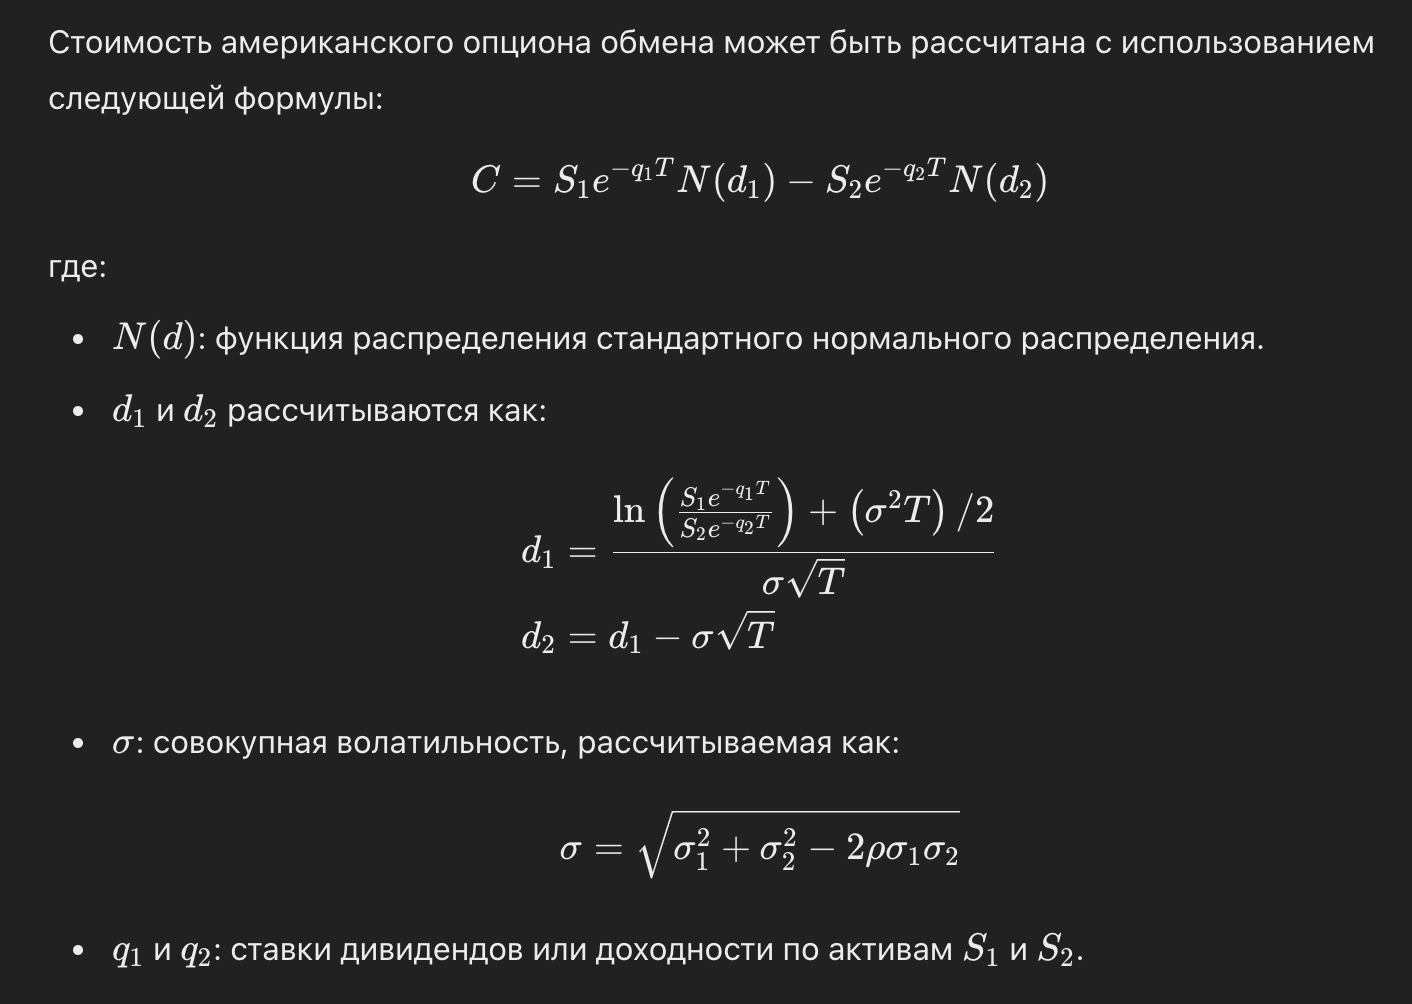

In [3]:
def american_exchange_option(S1, S2, sigma1, sigma2, rho, T, q1, q2):
    sigma = np.sqrt(sigma1**2 + sigma2**2 - 2 * rho * sigma1 * sigma2)
    d1 = (np.log((S1 * np.exp(-q1 * T)) / (S2 * np.exp(-q2 * T))) + 0.5 * sigma**2 * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    Nd1 = norm.cdf(d1)
    Nd2 = norm.cdf(d2)
    C = S1 * np.exp(-q1 * T) * Nd1 - S2 * np.exp(-q2 * T) * Nd2
    return C


S1 = 100
S2 = 95
sigma1 = 0.2
sigma2 = 0.25
rho = 0.5
T = 1
q1 = 0.02
q2 = 0.03

option_price = american_exchange_option(S1, S2, sigma1, sigma2, rho, T, q1, q2)
print(f"Стоимость опциона: ${option_price:.4f}")

Стоимость опциона: $11.8954


Этот тип опциона не является классическим call или put. Он даёт право обменивать активы, поэтому является отдельным видом финансового инструмента. По смыслу он ближе к call, поскольку владелец опциона выигрывает, если стоимость первого актива (
𝑆1) выше второго (𝑆2).

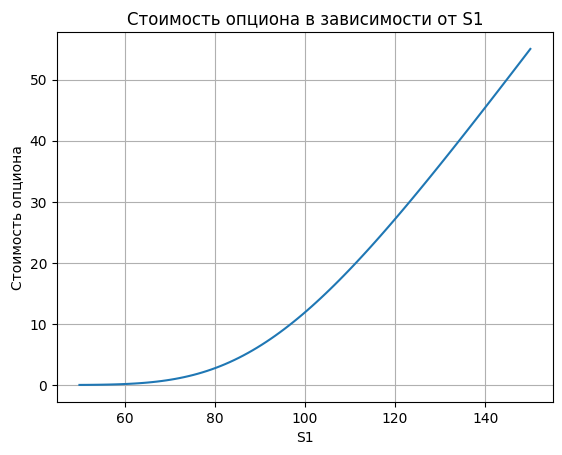

In [4]:
from scipy.special import erf
S1_values = np.linspace(50, 150, 100)
option_values = []

for S1 in S1_values:
    # Повторяем расчеты для каждого значения S1
    S2 = 95
    sigma1 = 0.2
    sigma2 = 0.25
    rho = 0.5
    T = 1
    q1 = 0.02
    q2 = 0.03
    
    sigma = np.sqrt(sigma1**2 + sigma2**2 - 2 * rho * sigma1 * sigma2)
    d1 = (np.log((S1 * np.exp(-q1 * T)) / (S2 * np.exp(-q2 * T))) + 0.5 * sigma**2 * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    Nd1 = 0.5 * (1 + erf(d1 / np.sqrt(2)))
    Nd2 = 0.5 * (1 + erf(d2 / np.sqrt(2)))
    C = S1 * np.exp(-q1 * T) * Nd1 - S2 * np.exp(-q2 * T) * Nd2
    option_values.append(C)

plt.plot(S1_values, option_values)
plt.title('Стоимость опциона в зависимости от S1')
plt.xlabel('S1')
plt.ylabel('Стоимость опциона')
plt.grid(True)
plt.show()


Анализ графика стоимости опциона exchange-one-asset-for-another

График демонстрирует зависимость стоимости опциона типа "exchange-one-asset-for-another" от цены первого актива \( S_1 \). 

## Описание опциона
Опцион "exchange-one-asset-for-another" предоставляет право владельцу обменять один актив (с ценой \( S_1 \)) на другой актив (с ценой \( S_2 \)). Стоимость такого опциона зависит от соотношения цен активов, волатильности, времени до исполнения и других факторов.

## Интерпретация графика
- **Ось X**: Цена первого актива (\( S_1 \)).
- **Ось Y**: Стоимость опциона.

### Ключевые выводы:
1. При низких значениях \( S_1 \), стоимость опциона близка к нулю, так как обмен становится невыгодным (\( S_1 < S_2 \)).
2. С ростом \( S_1 \) стоимость опциона увеличивается, так как обмен становится более выгодным для владельца (\( S_1 > S_2 \)).
3. Зависимость стоимости от \( S_1 \) имеет нелинейный характер, что обусловлено ростом вероятности превышения \( S_1 > S_2 \).



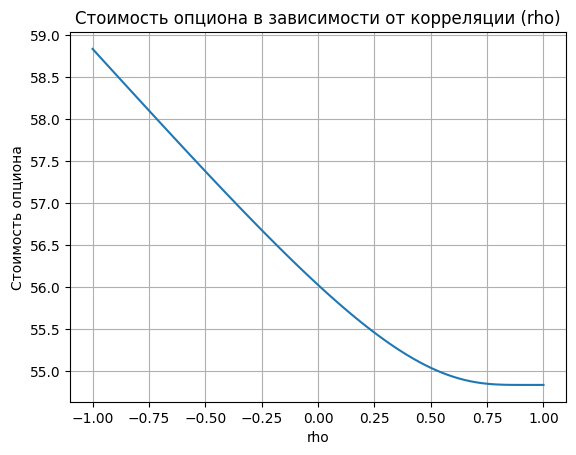

In [5]:
rho_values = np.linspace(-1, 1, 100)
option_values_rho = []

for rho in rho_values:
    sigma = np.sqrt(sigma1**2 + sigma2**2 - 2 * rho * sigma1 * sigma2)
    d1 = (np.log((S1 * np.exp(-q1 * T)) / (S2 * np.exp(-q2 * T))) + 0.5 * sigma**2 * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    Nd1 = 0.5 * (1 + erf(d1 / np.sqrt(2)))
    Nd2 = 0.5 * (1 + erf(d2 / np.sqrt(2)))
    C = S1 * np.exp(-q1 * T) * Nd1 - S2 * np.exp(-q2 * T) * Nd2
    option_values_rho.append(C)

plt.plot(rho_values, option_values_rho)
plt.title('Стоимость опциона в зависимости от корреляции (rho)')
plt.xlabel('rho')
plt.ylabel('Стоимость опциона')
plt.grid(True)
plt.show()


При низкой корреляции опционы становятся более ценными, так как цена активов менее предсказуема.

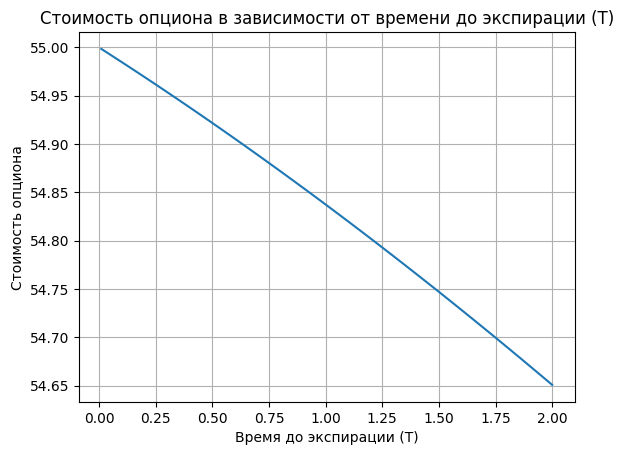

In [6]:
T_values = np.linspace(0.01, 2, 100)  # Время до экспирации от 0.01 до 2 лет
option_values_T = []

for T in T_values:
    sigma = np.sqrt(sigma1**2 + sigma2**2 - 2 * rho * sigma1 * sigma2)
    d1 = (np.log((S1 * np.exp(-q1 * T)) / (S2 * np.exp(-q2 * T))) + 0.5 * sigma**2 * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    Nd1 = 0.5 * (1 + erf(d1 / np.sqrt(2)))
    Nd2 = 0.5 * (1 + erf(d2 / np.sqrt(2)))
    C = S1 * np.exp(-q1 * T) * Nd1 - S2 * np.exp(-q2 * T) * Nd2
    option_values_T.append(C)

plt.plot(T_values, option_values_T)
plt.title('Стоимость опциона в зависимости от времени до экспирации (T)')
plt.xlabel('Время до экспирации (T)')
plt.ylabel('Стоимость опциона')
plt.grid(True)
plt.show()

Этот график отражает, как стоимость опциона меняется при изменении времени до истечения (\(T\)).


1. **Чем больше \(T\), тем выше стоимость опциона**:
   - Увеличение времени до истечения увеличивает неопределенность (волатильность) цен активов, что делает опцион более ценным.
   - У владельца опциона больше времени дождаться выгодного соотношения цен \(S_1\) и \(S_2\).
2. **Стоимость уменьшается, если \(T\) близится к нулю**:
   - Когда \(T стремится к 0\), опцион становится похож на немедленный обмен активов, и его стоимость приближается к разнице текущих цен активов.


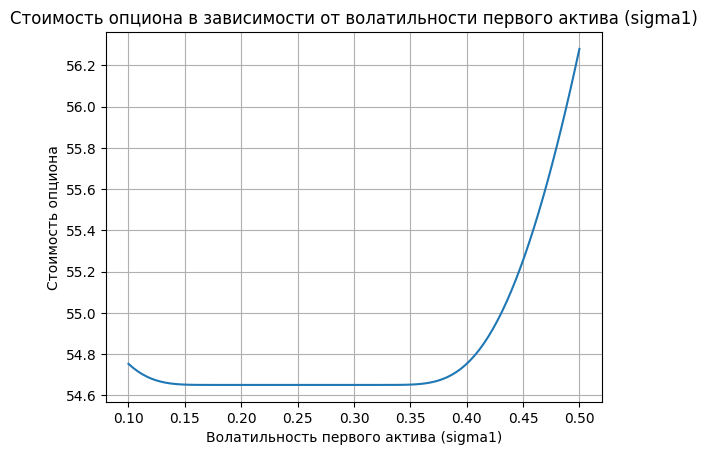

In [7]:
sigma1_values = np.linspace(0.1, 0.5, 100)  # Волатильность первого актива от 0.1 до 0.5
option_values_sigma1 = []

for sigma1 in sigma1_values:
    sigma = np.sqrt(sigma1**2 + sigma2**2 - 2 * rho * sigma1 * sigma2)
    d1 = (np.log((S1 * np.exp(-q1 * T)) / (S2 * np.exp(-q2 * T))) + 0.5 * sigma**2 * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    Nd1 = 0.5 * (1 + erf(d1 / np.sqrt(2)))
    Nd2 = 0.5 * (1 + erf(d2 / np.sqrt(2)))
    C = S1 * np.exp(-q1 * T) * Nd1 - S2 * np.exp(-q2 * T) * Nd2
    option_values_sigma1.append(C)

plt.plot(sigma1_values, option_values_sigma1)
plt.title('Стоимость опциона в зависимости от волатильности первого актива (sigma1)')
plt.xlabel('Волатильность первого актива (sigma1)')
plt.ylabel('Стоимость опциона')
plt.grid(True)
plt.show()

График иллюстрирует, как стоимость опциона изменяется в зависимости от волатильности (\(\sigma_1\)) первого актива.

1. **Чем выше волатильность (\(\sigma_1\)), тем выше стоимость опциона**:
   - Повышение волатильности увеличивает возможный диапазон цен \(S_1\), что делает опцион более ценным (увеличивается вероятность выгодного обмена \(S_1 > S_2\)).
   - Высокая волатильность = больше шансов на экстремальные изменения цен.
2. **При низкой волатильности (\(\sigma_1 \to 0\)) стоимость опциона уменьшается**:
   - Если цена актива почти стабильна (\(\sigma_1 \to 0\)), опцион теряет свою привлекательность, так как его стоимость становится почти предсказуемой и незначительной.